In [2]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.losses import SparseCategoricalCrossentropy
from matplotlib import pyplot as plt


2024-01-17 21:28:22.775314: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# 加载CIFAR-10数据集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 数据预处理
x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
# 构建模型
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 编译模型
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/Users/hfy/anaconda3/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 20s 13ms/step - loss: 1.4954 - accuracy: 0.4516 - val_loss: 1.2834 - val_accuracy: 0.5325
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1275 - accuracy: 0.5999 - val_loss: 1.1406 - val_accuracy: 0.5956
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9746 - accuracy: 0.6582 - val_loss: 0.9705 - val_accuracy: 0.6667
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8828 - accuracy: 0.6890 - val_loss: 0.9146 - val_accuracy: 0.6792
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8048 - accuracy: 0.7177 - val_loss: 1.0272 - val_accuracy: 0.6601
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7518 - accuracy: 0.7340 - val_loss: 0.8618 - val_accuracy: 0.7028
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7009 - accuracy: 0.7512 - val_loss: 0.8515 - val_accura

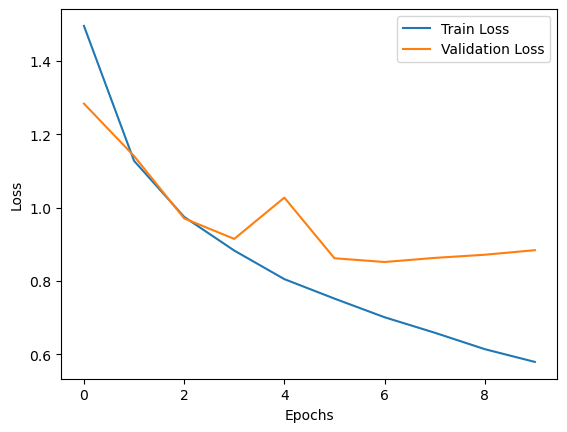

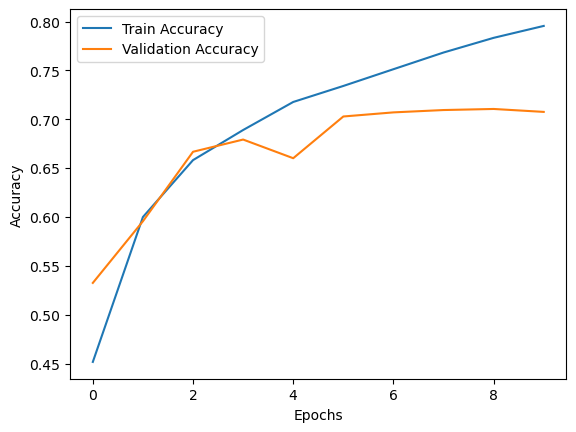

In [6]:
# 绘制损失曲线和准确率曲线

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()